クロスする部分を好転と置いたとき、その数値をノードの大きさとして可視化している。
理由としてはそれが活性値としてもち、閾値の判定時に大きいものが選択される。
また、閾値を複数が超えている場合はその中から選択される。
それらの視認性を高めている。


それらは色を変えて配置することで視認性を高めよう。
次のプログラムでやります。

In [1]:
import sqlite3
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def NetworkX(df):
    G = nx.DiGraph()

    # ノードを追加
    nodes = df.columns
    for node in nodes:
        G.add_node(node)

    # エッジを追加
    for i in range(len(nodes)):
        for j in range(len(nodes)):
            distance = df.iloc[i, j]
            if i != j:  # iとjが同じでない場合のみエッジを追加
                if distance != 0.0:
                    G.add_edge(nodes[i], nodes[j], weight=distance)
            else:
                node_size = distance*1000  # iとjが同じ場合、ノードの大きさを設定
                G.nodes[nodes[i]]['size'] = node_size

    # ネットワーク図を描画
    pos = nx.spring_layout(G)  # レイアウトを設定
    edge_labels = {(u, v): str(d['weight']) for u, v, d in G.edges(data=True)}
    
    node_sizes = [G.nodes[node].get('size', 500) for node in G.nodes]
    nx.draw(G, pos, with_labels=True, node_size=node_sizes, node_color='skyblue', font_size=10, font_color='black', arrowsize=20)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)  # エッジのラベルを表示
    plt.title("Network Graph")
    plt.show()

def SQL_SetUp(database_path):
    conn = sqlite3.connect(database_path)
    cursor = conn.cursor()

    # データベースファイルが存在する場合は処理を終了
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
    existing_tables = cursor.fetchall()
    if existing_tables:
        print("Database already exists. Exiting setup.")
        conn.close()
        return

    # テーブルを作成
    cursor.execute('''
        CREATE TABLE knowledge (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            data TEXT,
            Adata FLOAT,
            Bdata FLOAT,
            Cdata FLOAT,
            Ddata FLOAT,
            Edata FLOAT,
            Fdata FLOAT
        )
    ''')

    # 配列の定義   
    data = [["Adata",1, 0.2, 0.2, 0, 0, 0],
            ["Bdata",0.2, 2, 0.1, 0.4, 0.4, 0],
            ["Cdata",0.2, 0.1, 3, 0, 0, 0.6],
            ["Ddata",0, 0.4, 0, 4, 0, 0],
            ["Edata",0, 0.4, 0, 0, 5, 0],
            ["Fdata",0, 0, 0.6, 0, 0, 6]]
    
    # データを挿入
    cursor.executemany("INSERT INTO knowledge (data, Adata, Bdata, Cdata, Ddata, Edata, Fdata) VALUES (?, ?, ?, ?, ?, ?, ?)", data)

    conn.commit()
    conn.close()


def SQL_GetData(database_path):
    conn = sqlite3.connect(database_path)
    cursor = conn.cursor()

    # データを取得してDataFrameに格納
    cursor.execute("SELECT * FROM knowledge")
    rows = cursor.fetchall()
    columns = [description[0] for description in cursor.description]
    df = pd.DataFrame(rows, columns=columns)

    conn.close()

    # "data"列をデータフレームのインデックスに設定
    df.set_index("data", inplace=True)
    # 不要な"id"列を削除
    df.drop("id", axis=1, inplace=True)

    return df


Database already exists. Exiting setup.
       Adata  Bdata  Cdata  Ddata  Edata  Fdata
data                                           
Adata    1.0    0.2    0.2    0.0    0.0    0.0
Bdata    0.2    2.0    0.1    0.4    0.4    0.0
Cdata    0.2    0.1    3.0    0.0    0.0    0.6
Ddata    0.0    0.4    0.0    4.0    0.0    0.0
Edata    0.0    0.4    0.0    0.0    5.0    0.0
Fdata    0.0    0.0    0.6    0.0    0.0    6.0


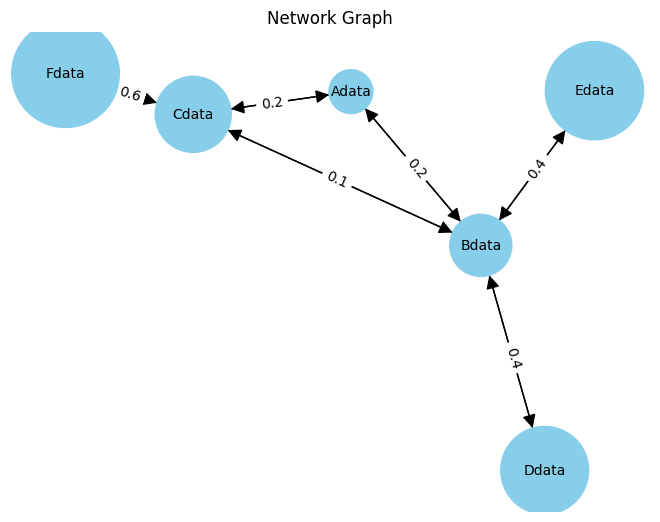

In [3]:
# データベースのセットアップ
SQL_SetUp("database_v04.sqlite")

# データの取
df = SQL_GetData("database_v04.sqlite")

# データの表示
print(df)

# データの可視化
NetworkX(df)